# Kmean Clustering
- Simple example 
- Titanic example. 



**1- Import libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

**2- Create 7 observations in a 2D space.**

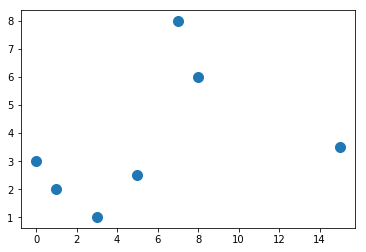

In [2]:
X=np.array([[1,2],
            [3,1],
            [5,2.5],
            [8,6],
            [0,3],
            [15,3.5],
            [7,8]
           ])

plt.scatter(X[:,0],X[:,1], s=100)
plt.show()

**3- Create a [KMean](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) Object and fit(X)**

In [3]:
clr=KMeans(n_clusters=3)

clr.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

**4- Plot the observations with different colors (using .labels attribute)**



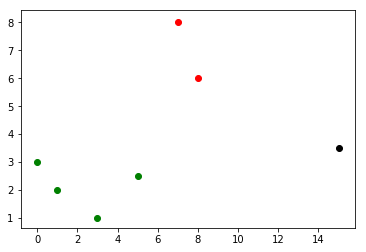

In [4]:
labels=clr.labels_

colors=10*['r','g','k']

for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c=colors[labels[i]])
    
plt.show()

**5- Specify the centroid of each cluster in the figure with a blue cross.** 

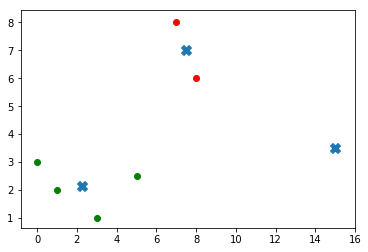

In [5]:
centroid = clr.cluster_centers_
labels=clr.labels_

colors=['r','g','k']

for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c=colors[labels[i]])

plt.scatter(centroid[:,0],centroid[:,1], marker='X', s=100)    
plt.show()

**6- Predict the group lables for new points=[9,5],[.1,0],[14,2] belongs to which group.**

In [6]:
clr.predict([[9,5],[.1,0],[14,2]])

array([0, 1, 2])

7- Plot .inertia_ for  

In [7]:
clr.inertia_ 

19.4375

In [8]:
clr.n_iter_ 

2

In [9]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
#from PIL import Image, ImageFilter
n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")


Automatically created module for IPython interactive environment


In [10]:
china.shape

(427, 640, 3)

In [11]:

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
clr = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))



Fitting model on a small sub-sample of the data
done in 0.799s.


In [12]:
myl=np.array([[1,2],
          [3,4],
          [5,6],
          [7,8],
              [9,10],
              [11,12]
    
])

shuffle(myl)[:5]

array([[ 3,  4],
       [ 1,  2],
       [ 7,  8],
       [ 9, 10],
       [ 5,  6]])

### Use the model (created with sub-sample of data) to get the labels for all points

In [13]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = clr.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))




Predicting color indices on the full image (k-means)
done in 0.618s.
Predicting color indices on the full image (random)
done in 0.589s.


In [14]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
   # print('d = codebook.shape[1]:  ', codebook.shape[1])
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
         #   print('chiye in: ',codebook[labels[label_idx]])
         #   print('un yeki: ', image[i][j])
            label_idx += 1
    return image



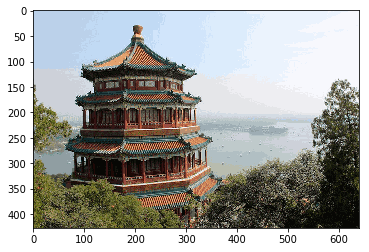

In [15]:
plt.imshow(recreate_image(clr.cluster_centers_, labels, w, h))

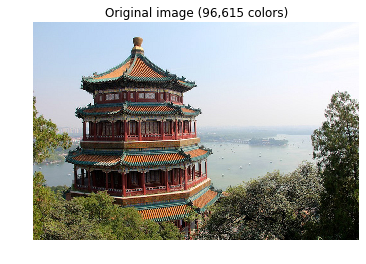

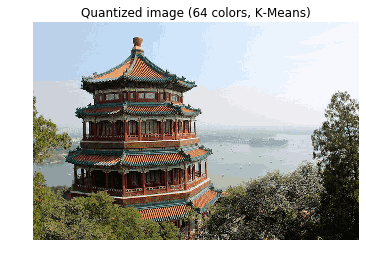

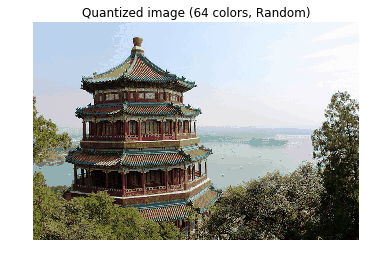

In [16]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(clr.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()